## Normal Distribution Simulation, Fitting, and Outlier Analysis



## 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(42)

## (a) Data Simulation

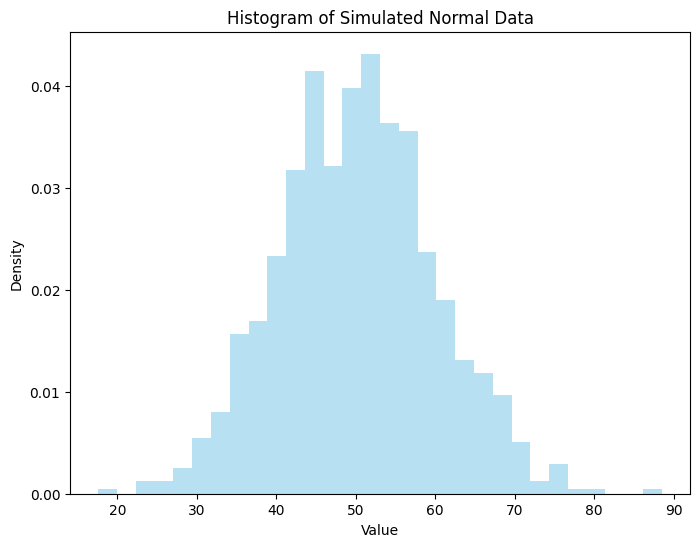

In [2]:
# Simulating 1000 samples from a normal distribution with mean=50 and std=10
data_normal = np.random.normal(loc=50, scale=10, size=1000)

# Plotting the histogram of the simulated data
plt.figure(figsize=(8, 6))
plt.hist(data_normal, bins=30, density=True, alpha=0.6, color='skyblue')
plt.title("Histogram of Simulated Normal Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

## (b) Normal Distribution Fitting (Without Outliers)

Estimated parameters (original data):
Mean: 50.19
Standard Deviation: 9.79


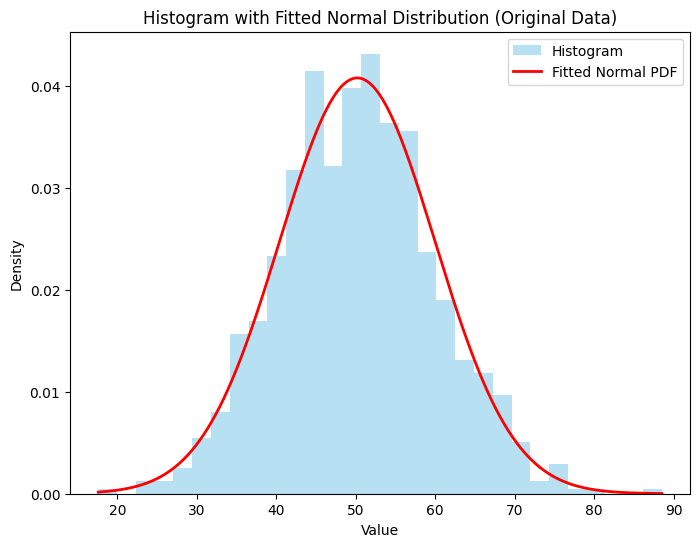

In [3]:
mu_mle = np.mean(data_normal)
sigma_mle = np.std(data_normal, ddof=0)  # ddof=0 gives the MLE estimate for standard deviation

print("Estimated parameters (original data):")
print("Mean: {:.2f}".format(mu_mle))
print("Standard Deviation: {:.2f}".format(sigma_mle))

# Generating x values for the PDF plot
x_values = np.linspace(min(data_normal), max(data_normal), 1000)
pdf_values = norm.pdf(x_values, loc=mu_mle, scale=sigma_mle)

# Plotting histogram and overlaying the fitted normal PDF
plt.figure(figsize=(8, 6))
plt.hist(data_normal, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram')
plt.plot(x_values, pdf_values, 'r', lw=2, label='Fitted Normal PDF')
plt.title("Histogram with Fitted Normal Distribution (Original Data)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

## (c) Handling Outliers

Estimated parameters (data with outliers):
Mean: 53.79
Standard Deviation: 19.01


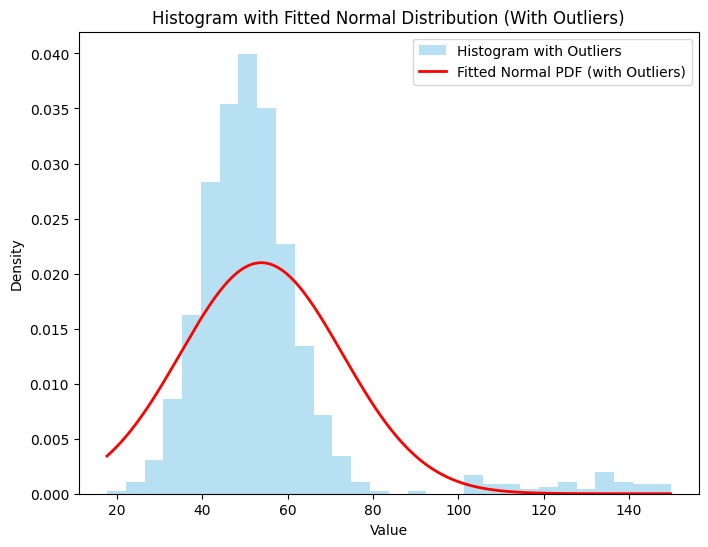

In [4]:
data_outliers = np.random.uniform(low=100, high=150, size=50)

# Creating the new dataset by concatenating the original data and the outliers
data_with_outliers = np.concatenate([data_normal, data_outliers])

# Fit a normal distribution to the dataset with outliers using MLE
mu_mle_outliers = np.mean(data_with_outliers)
sigma_mle_outliers = np.std(data_with_outliers, ddof=0)

print("Estimated parameters (data with outliers):")
print("Mean: {:.2f}".format(mu_mle_outliers))
print("Standard Deviation: {:.2f}".format(sigma_mle_outliers))

# Generating x values for the PDF plot of the data with outliers
x_values_outliers = np.linspace(min(data_with_outliers), max(data_with_outliers), 1000)
pdf_values_outliers = norm.pdf(x_values_outliers, loc=mu_mle_outliers, scale=sigma_mle_outliers)

# Plotting histogram and overlaying the fitted normal PDF for the data with outliers
plt.figure(figsize=(8, 6))
plt.hist(data_with_outliers, bins=30, density=True, alpha=0.6, color='skyblue', label='Histogram with Outliers')
plt.plot(x_values_outliers, pdf_values_outliers, 'r', lw=2, label='Fitted Normal PDF (with Outliers)')
plt.title("Histogram with Fitted Normal Distribution (With Outliers)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

## Comparison
When working with our original dataset, we notice that the maximum likelihood estimates (MLE) for the mean and standard deviation are very close to the true values, around μ = 50 and σ = 10. However, once we introduce 50 additional samples drawn from a uniform distribution between 100 and 150, things change. The estimated mean shifts upward and the standard deviation increases noticeably. This happens because the outliers are pulling the data’s central tendency toward higher values and adding extra spread.

# Detecting outliers
1) Z-score Method:
This approach involves calculating the Z-score for each data point, which tells us how many standard deviations a particular value is from the mean.Any data point with a Z-score higher than 3 or lower than -3 is considered an outlier.
#
2) Interquartile Range (IQR) Method:
We first find the first quartile (Q1) and the third quartile (Q3) of our dataset, then we calculate the IQR by subtracting Q1 from Q3. Any data point that falls below Q1 - 1.5×IQR or above Q3 + 1.5×IQR is considered as an outlier.
